In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# loading data
life_data_path = "Life Expectancy Data.csv"
life_df = pd.read_csv(life_data_path)

In [3]:
# data cleaning, this might be too aggressive. (removed U.S.A.)
# Maybe we extract only relevant columns, then do a dropna to hopefully preserve some data. 
clean_ld = life_df.dropna() 

In [59]:
# Summary of potential Life expctancy factors by nation
le_factors = ['Status','infant deaths', 'Life expectancy ', 
                        'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', 
                        ' BMI ','Polio', 'Total expenditure','Diphtheria ', 
                        ' HIV/AIDS', 'GDP', 'Population',' thinness  1-19 years', 
                        ' thinness 5-9 years','Schooling']

inital_summary = clean_ld.groupby("Country")[le_factors].agg("min")
nation_statuses = clean_ld[["Country","Status"]].drop_duplicates()
summary_by_nation = pd.merge(inital_summary, nation_statuses , on=["Country"])

In [55]:
# Charting LE Result function
def chart_le_scatter(factor):
    summary_by_nation.plot(x=factor,y='Life expectancy ',kind="scatter")
    
def chart_le_wlr(factor):
    x_values = summary_by_nation[factor]
    y_values = summary_by_nation["Life expectancy "]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # # Label plot and annotate the line equation
    plt.xlabel(factor)
    plt.ylabel("Life expectancy ")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

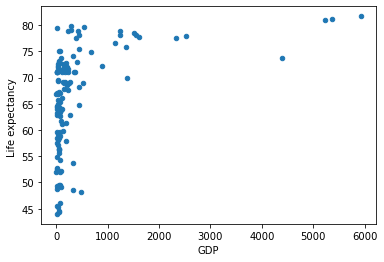

In [60]:
# using functions

chart_le_scatter("GDP")
# chart_le_wlr(le_factors[13])
# summary_by_nation["Population"]
# short_summ = summary_by_nation[["Country", "Population"]]
# short_summ.sort_values(inplace=True, by=["Population"])
# india = short_summ[short_summ["Country"] == "India"]
# indias data is wacky bonko nonsense sooooo we arent totally sure how reliable any of it is 

# We Were having a geat time. Made our nation based summary of potential le factors. We went
# to plot population against le and found a strnage looking graph, we then looked deeper
# and chris helped us see that our data is worth less than a car
# with no wheeels no engine no steering wheel and no gas
# so we might find another dataset. 
# reginald votes to ignore this reveletion as long as feasible and maybe just remove all the 
# dirty data.
